In [227]:
from copy import copy
import numpy as np 
import pandas as pd 
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [218]:
results_path = glob("test_cv_*/result/result.pkl")
results_path.sort(key=lambda x: int(x[8]))
results_path

['test_cv_1/result/result.pkl',
 'test_cv_2/result/result.pkl',
 'test_cv_3/result/result.pkl',
 'test_cv_4/result/result.pkl',
 'test_cv_5/result/result.pkl',
 'test_cv_6/result/result.pkl']

In [219]:
def cal_cv(data, axis=0):
    # 輸出 CV值 (in percentage)
    return data.std(axis)/data.mean(axis) * 100

data = np.array([[1, 1], [1, 3], [1, 5], [1, 0]])
cal_cv(data)

array([ 0.        , 85.34606387])

In [220]:
spec = []
for p in results_path:
    spec.append(np.load(p))
spec = np.asarray(spec)

In [16]:
# spec.shape 
# (5, 101, 5, 36)
# (測試, ScvO2, SDS, 光譜)

In [221]:
cv = cal_cv(spec)

In [222]:
cv.shape

(101, 5, 36)

In [223]:
spec[:, 91, 0, 1]

array([4.09811218e-07, 4.04408478e-07, 4.04029144e-07, 4.02395935e-07,
       4.16041382e-07, 4.17883575e-07])

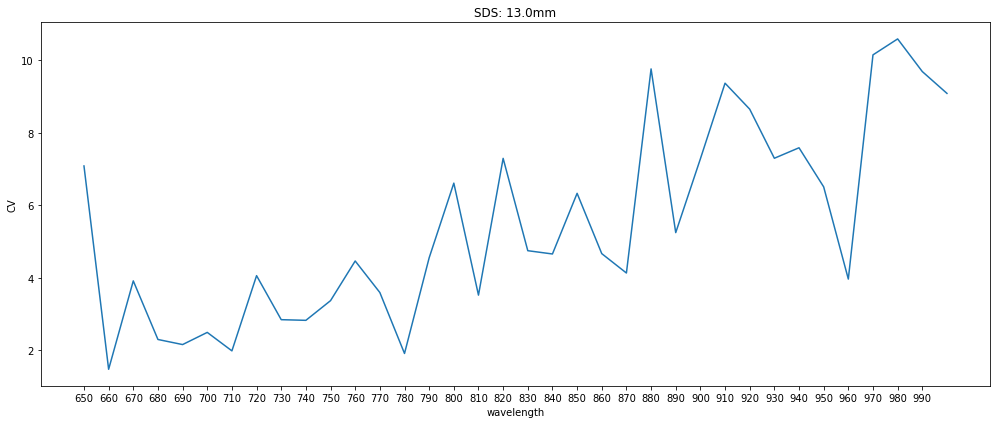

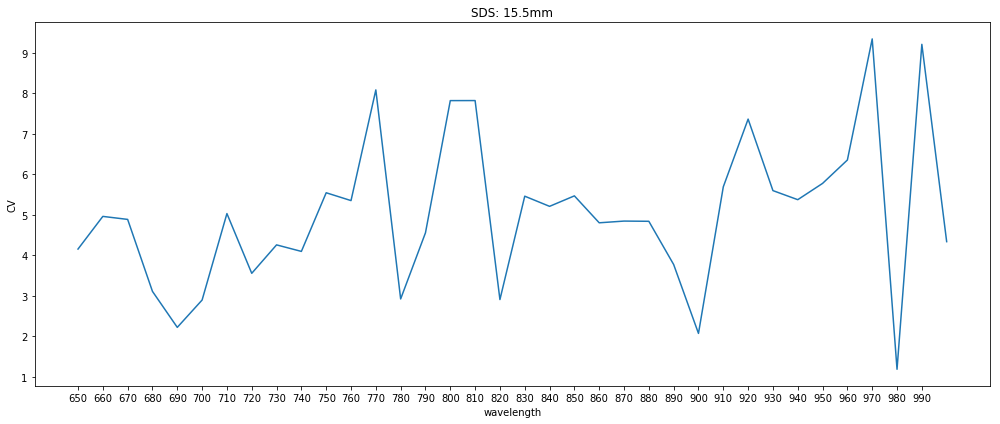

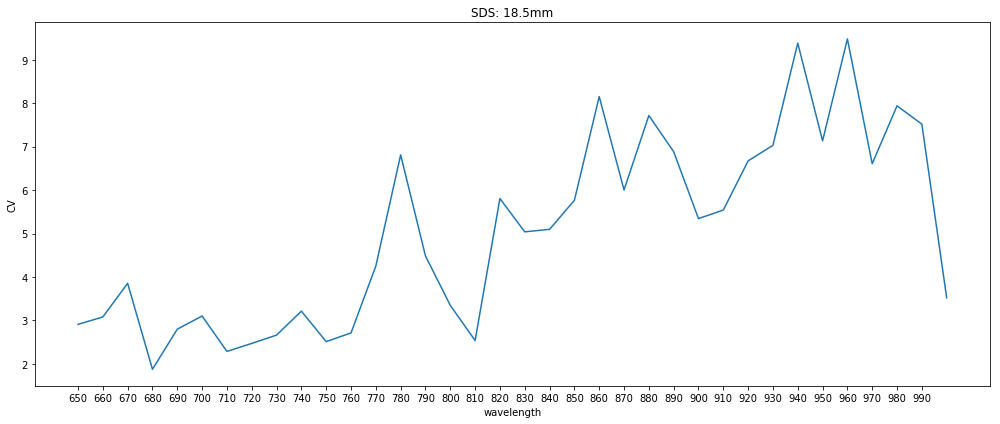

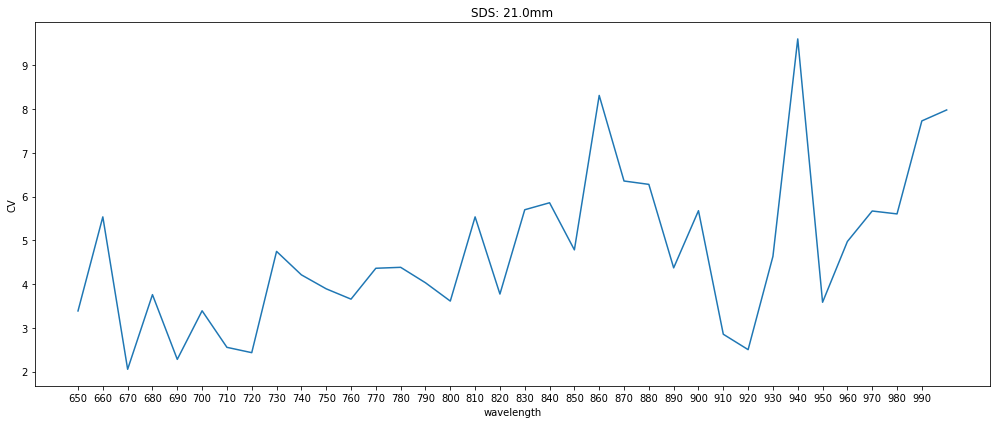

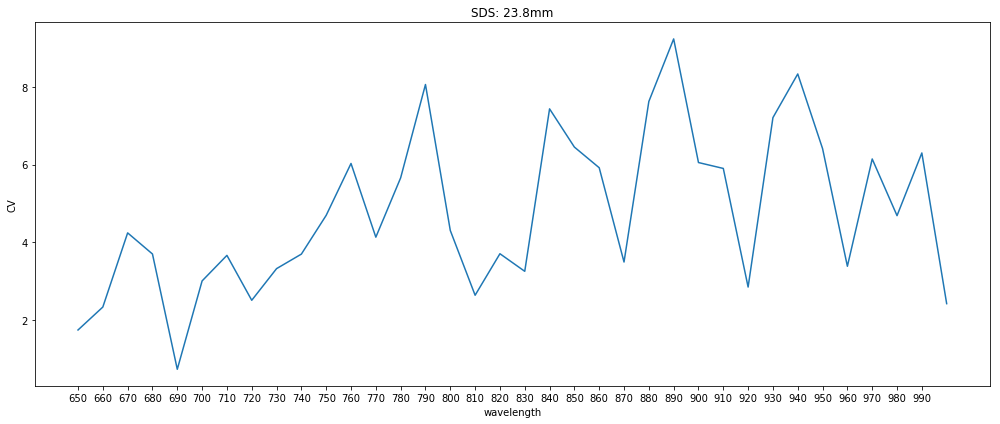

In [224]:
for i in range(5):
    plt.figure(figsize=(14, 6))
    plt.plot(cv[91, i, :])
    plt.xlabel("wavelength")
    plt.ylabel("CV")
    plt.xticks([i for i in range(35)], [str(i) for i in range(650, 1001, 10)])
    plt.title("SDS: %.1fmm" % sds[i])
    plt.tight_layout()
    plt.savefig("cv_scv90_%d.png" % i)
    
    

In [225]:
# Before smooth
for i in range(5):
    print(cv[91, i, :].mean())

5.44755045845067
5.024243256024781
5.043838642683706
4.724579223352418
4.755721651713849


In [226]:
class KDE:
	def __init__(self): 
		pass

	def fit(self, x, band_width):
		smoothed = np.zeros(len(x))
		for idx, xx in enumerate(x):
			smoothed += xx*self.gaussian(np.arange(len(x)), idx, band_width)
		
		return smoothed 

	@staticmethod
	def gaussian(x, mean, std):

		x = np.asarray(x)
		denominator = std*np.sqrt(2*np.pi)
		numerator = np.exp(-0.5*((x-mean)/std)**2)
		distribution =  numerator/denominator
		distribution /= distribution.sum()

		return distribution
kde = KDE()

In [237]:
spec_smooth = copy(spec)
for i in range(6):
    for j in range(101):
        for k in range(5):
            spec_smooth[i, j, k, :] = kde.fit(spec[i, j, k, :], 3)

In [238]:
cv_smooth = cal_cv(spec_smooth)

In [242]:
# after smooth
for i in range(5):
    print(cv_smooth[91, i, :].mean())

1.9279798717749992
1.6131035516765757
1.7760863396979218
1.433324100384207
1.4508317210102106


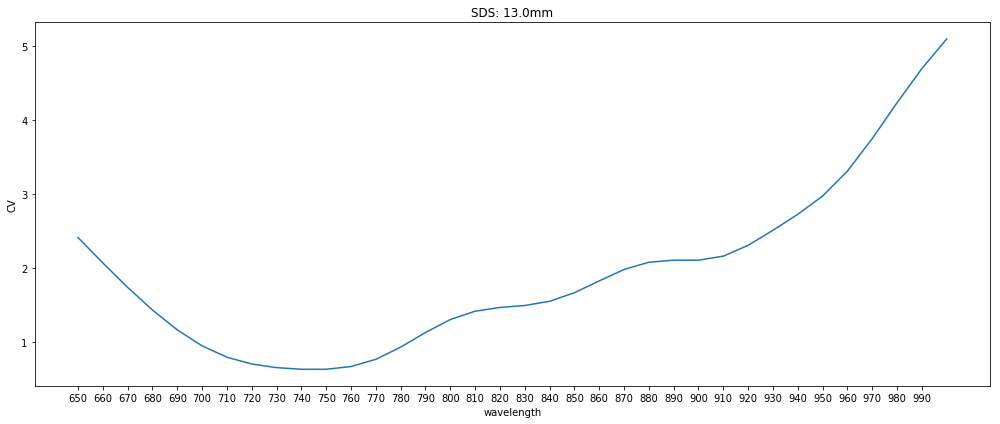

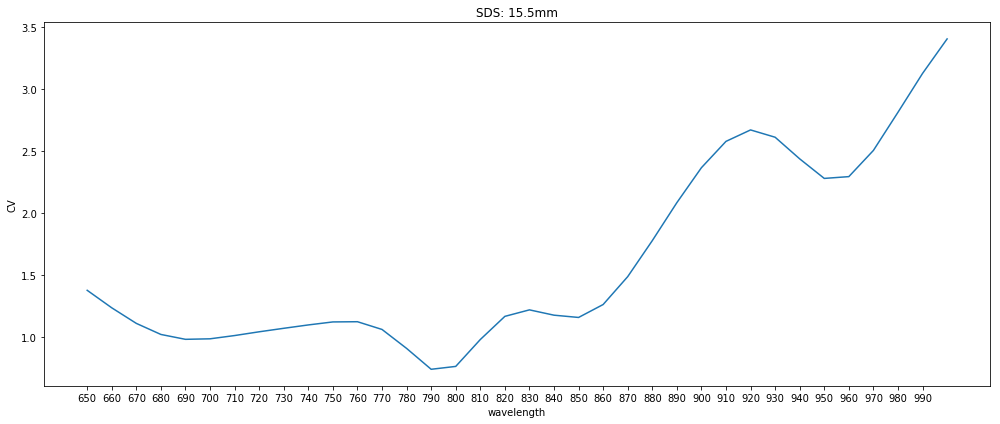

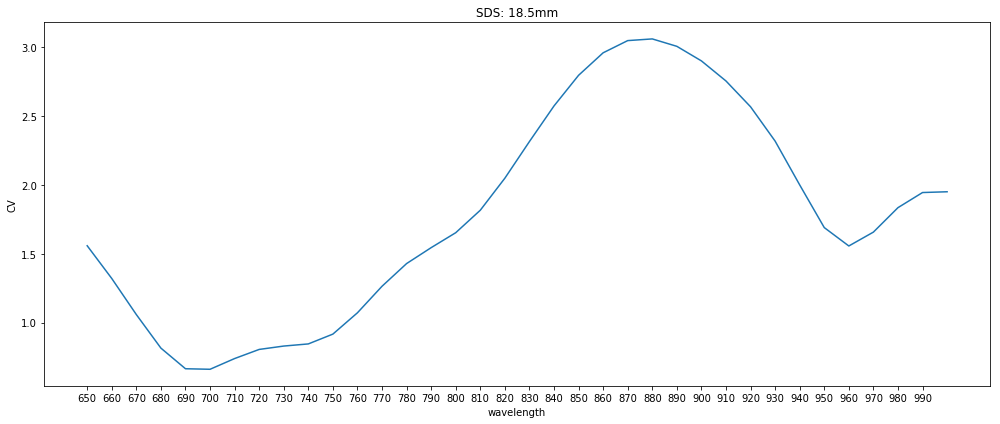

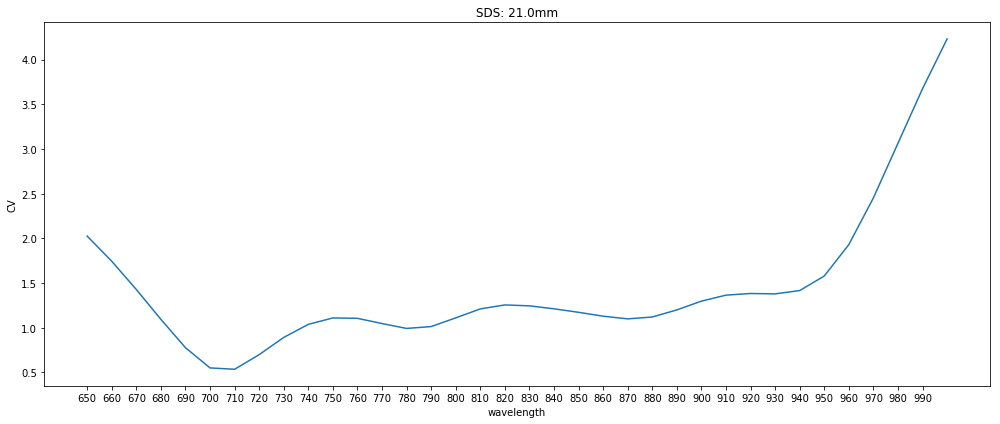

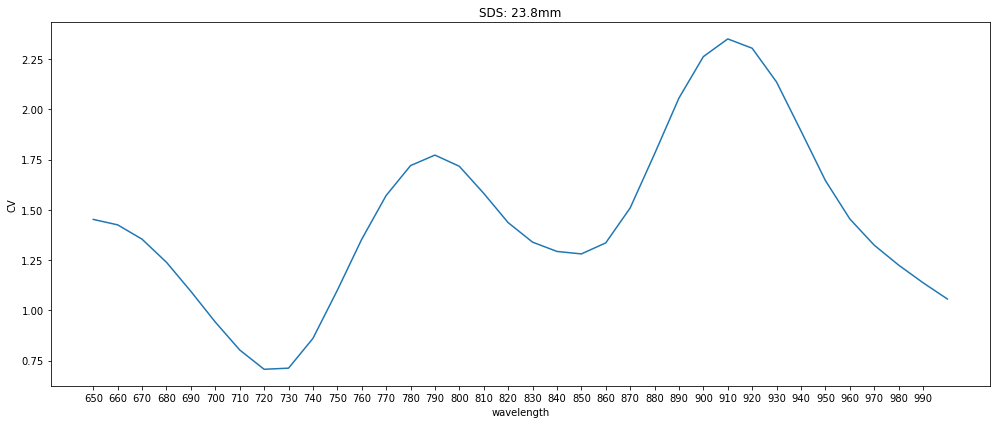

In [243]:
for i in range(5):
    plt.figure(figsize=(14, 6))
    plt.plot(cv_smooth[91, i, :])
    plt.xlabel("wavelength")
    plt.ylabel("CV")
    plt.xticks([i for i in range(35)], [str(i) for i in range(650, 1001, 10)])
    plt.title("SDS: %.1fmm" % sds[i])
    plt.tight_layout()
    plt.savefig("cv_scv90_%d.png" % i)

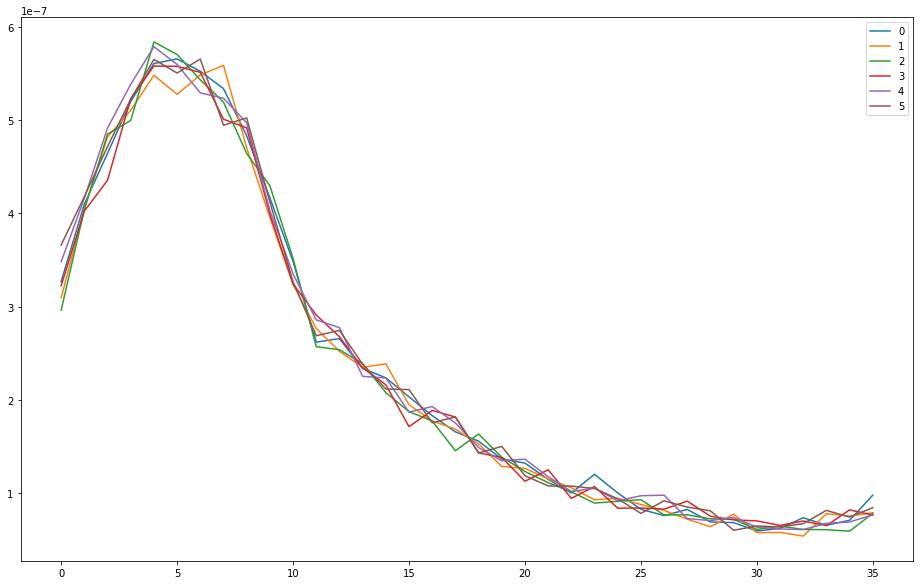

In [236]:
plt.figure(figsize=(16, 10))
for i in range(6):
    plt.plot(spec[i, 91, 0, :], label="%d" % i)
plt.legend()
plt.show()


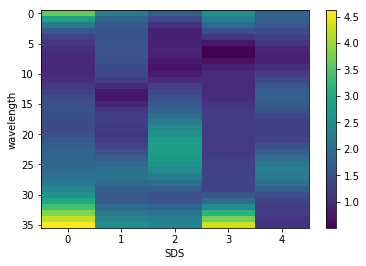

In [244]:
plt.imshow(cv_smooth.mean(2), aspect="auto")
plt.xlabel("SDS")
plt.ylabel("ScvO2")
plt.colorbar()
# plt.show()
plt.savefig("cv_hm_scv.png")
plt.clf()
plt.imshow(cv_smooth.mean(0).T, aspect="auto")
plt.xlabel("SDS")
plt.ylabel("wavelength")
plt.colorbar()
plt.savefig("cv_hm_wl.png")

# plt.show()

In [32]:
import random
random.randint(1, 1000000000)

769985128

In [36]:
fiber_p = glob("test_*_fiber/result/result.pkl")

In [83]:
data = []
for p in fiber_p:
    data.append(np.load(p))
data = np.asarray(data)
fiber_p
data.shape

(2, 101, 5, 36)

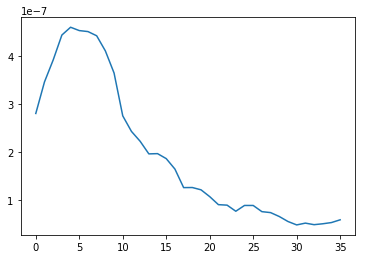

In [43]:
data.shape
plt.plot(data[0, 90, 1, :])

In [79]:
def cal_sen(x1, x2):
    return np.abs(x2 - x1).mean()/(x1).mean()
cal_sen(np.array([1,2,3]), np.array([0,2,4]))

0.3333333333333333

In [100]:
# sensitivity
percentage = [i for i in range(100)]
sensitivity0 = []
sensitivity1 = []
sds = [13, 15.5, 18.5, 21, 23.75]
plt.figure(figsize=(12,8))
for s in range(5):
    sen0 = []
    sen1 = []
    for i in range(100):
        s0 = cal_sen(data[0, i, s, :], data[0, i+1, s, :])/1
        sen0.append(s0)
        s1 = cal_sen(data[1, i, s, :], data[1, i+1, s, :])/1
        sen1.append(s1)
    sensitivity0.append(sen0)
    sensitivity1.append(sen1)
    plt.plot(percentage, sen0, label="new_%.1f" % sds[s])
    plt.plot(percentage, sen1, label="old_%.1f" % sds[s])
    plt.legend()
    plt.title("sensitivity on SDS %.1fmm" % (sds[s]))
    plt.ylabel("sensitivity")
    plt.xlabel("ScvO2")
    #     plt.show()
    plt.savefig("sens_%d.png" % s)
#     plt.savefig("total.png")
    plt.clf()
    


<Figure size 864x576 with 0 Axes>

In [108]:
s_0 = np.asarray(sensitivity0)
s_1 = np.asarray(sensitivity1)

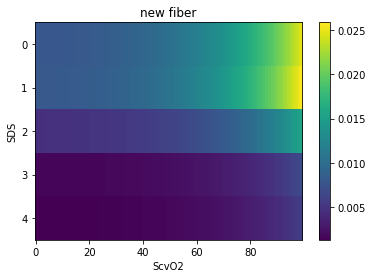

In [107]:
plt.imshow(s_0, aspect='auto')
plt.xlabel("ScvO2")
plt.ylabel("SDS")
plt.title("new fiber")
plt.colorbar()
plt.savefig("new_hm.png")

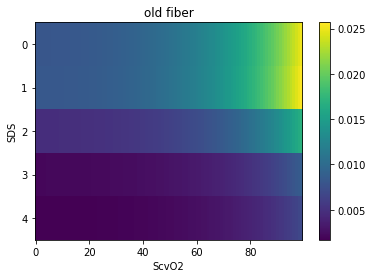

In [109]:
plt.imshow(s_1, aspect='auto')
plt.xlabel("ScvO2")
plt.ylabel("SDS")
plt.title("old fiber")
plt.colorbar()
plt.savefig("old_hm.png")


In [78]:
a = data[0, 90, 0, :]
b = data[0, 91, 0, :]
np.abs(a - b).sum()/a.mean()

0.7324594047506984

In [110]:
data.shape

(2, 101, 5, 36)

In [198]:
def cal_sen2(x1, x2):
    return np.abs(x2 - x1)/x1

In [201]:
wl = [str(i) for i in range(650, 1001, 10)]

for s in range(5):
    sww_0 = []
    sww_1 = []
    for p in range(100):
        sw_0 = []
        sw_1 = []
        for w in range(36):
            sw_0.append(cal_sen2(data[0, i, s, w], data[0, i+1, s, w]))
            sw_1.append(cal_sen2(data[1, i, s, w], data[1, i+1, s, w]))
        sww_0.append(sw_0)
        sww_1.append(sw_1)
    sww_0 = np.asarray(sww_0)
    sww_1 = np.asarray(sww_1) 
    plt.figure(figsize=(18, 10))
    plt.imshow(sww_0, aspect='auto')
    plt.xticks([i for i in range(36)], labels=wl)
    plt.colorbar()
    plt.xlabel("wavelength")
    plt.ylabel("ScvO2")
    plt.title("new fiber SDS %.1fmm" % sds[s])
#     plt.show()
    plt.savefig("new_wl_hm_%d.png" % s)
    plt.clf()
    
    plt.figure(figsize=(18, 10))
    plt.imshow(sww_1, aspect='auto')
    plt.xticks([i for i in range(36)], labels=wl)
    plt.colorbar()
    plt.xlabel("wavelength")
    plt.ylabel("ScvO2")
    plt.title("old SDS %.1fmm" % sds[s])
#     plt.show()
    plt.savefig("old_wl_hm_%d.png" % s)
    plt.clf()
    

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

In [191]:
sww_0.shape

(100, 36)

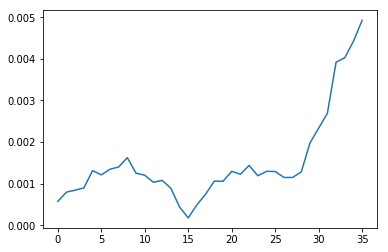

In [200]:
plt.plot(sww_0[91])

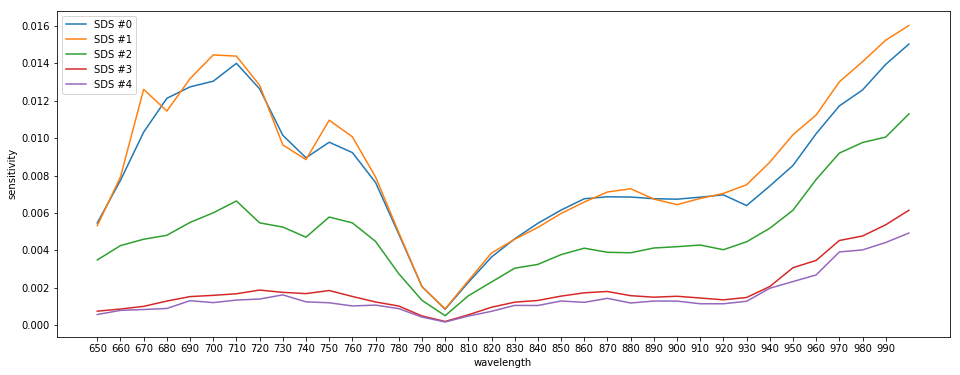

In [199]:
plt.figure(figsize=(16, 6))

for s in range(5):
    sww_0 = []
    sww_1 = []
    for p in range(100):
        sw_0 = []
        sw_1 = []
        for w in range(36):
            sw_0.append(cal_sen2(data[0, i, s, w], data[0, i+1, s, w]))
            sw_1.append(cal_sen2(data[1, i, s, w], data[1, i+1, s, w]))
        sww_0.append(sw_0)
        sww_1.append(sw_1)
    sww_0 = np.asarray(sww_0)
    sww_1 = np.asarray(sww_1) 
    plt.plot(sww_0.mean(0), label="SDS #%d" % s)
plt.legend()
plt.xlabel("wavelength")
plt.xticks([i for i in range(35)], [str(i) for i in range(650, 1001, 10)])
plt.ylabel("sensitivity")
plt.savefig("sens_wl.png")